# Simple Linear Regression

## -Tanisha Rakshit

In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours he studied. This is a simple linear regression task as it involves two variables.

## 1-- Importing all the libraries required for the task

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 2-- Reading data from the remote link

In [4]:
url = "http://bit.ly/w-data"
data=pd.read_csv(url)
print("Data imported successfully")
data.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


Now we have to plot our data points on a 2D graph to see if we can maually find any relationship between the data.

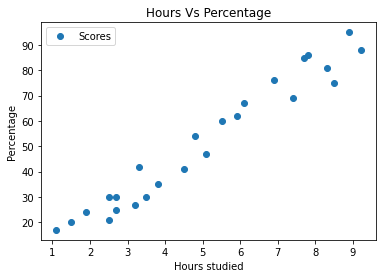

In [5]:
# Plotting the distribution of scores
data.plot(x='Hours',y='Scores', style='o')
plt.title("Hours Vs Percentage")
plt.xlabel('Hours studied')
plt.ylabel('Percentage')
plt.show()

**From the graph we can see that there is a positive linear correlation between the number of hours studied and the percentage scored**

## 3-- Preparing the data

The next step is to divide the data into "attributes" (inputs) and "labels" (output)

In [6]:
x = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values

Now that we have our attributes and labels we have to split the data into its training and test sets. We'll do this by using Scikit Learn's built in train_test_split() method.

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.2,random_state=0)

## 4-- Training the algorithm

We have split our data into training and testing sets. Now it is time to train our algorithm

In [8]:
from sklearn.linear_model import LinearRegression
regressor= LinearRegression()
regressor.fit(x_train,y_train)
print("Training complete")

Training complete


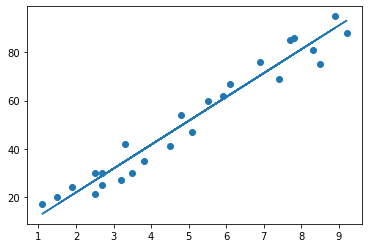

In [9]:
#Plotting the regression line
line= regressor.coef_*x+regressor.intercept_
# Plotting the test data
plt.scatter(x,y)
plt.plot(x,line)
plt.show()

## 5-- Making some predictions

Now that we have trained our model, it is necessary for us to make some predictions.

In [10]:
#Testing data in hours
print(x_test)
# predicting the corresponding scores
y_pred=regressor.predict(x_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [12]:
#Comparing Actual Vs Predicted
df=pd.DataFrame({'Actual':y_test,'Predicted': y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


You can also test with your own data

In [13]:
hours=[[8.73]]
pred=regressor.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(pred[0]))

No of Hours = [[8.73]]
Predicted Score = 88.53819111744141


## 6-- Evaluating the model

The final step is to evaluate the performance of the algorithm. This step is very important to compare how well different algorithms perform on a particular dataset. We have used mean square error for simplicity.

In [14]:
from sklearn import metrics
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 4.183859899002982
